In [219]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import utils, datasets, layers, models
import matplotlib.pyplot as plt

In [220]:
#Load the data set
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [221]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [222]:
#Explore the training set
train_images.shape

(60000, 28, 28)

In [223]:
#Number of labels in training set
len(train_labels)

60000

In [224]:
#Each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [225]:
#Explore the testing set
test_images.shape

(10000, 28, 28)

In [226]:
#Number of label in the testing set
len(test_labels)

10000

In [227]:
#Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

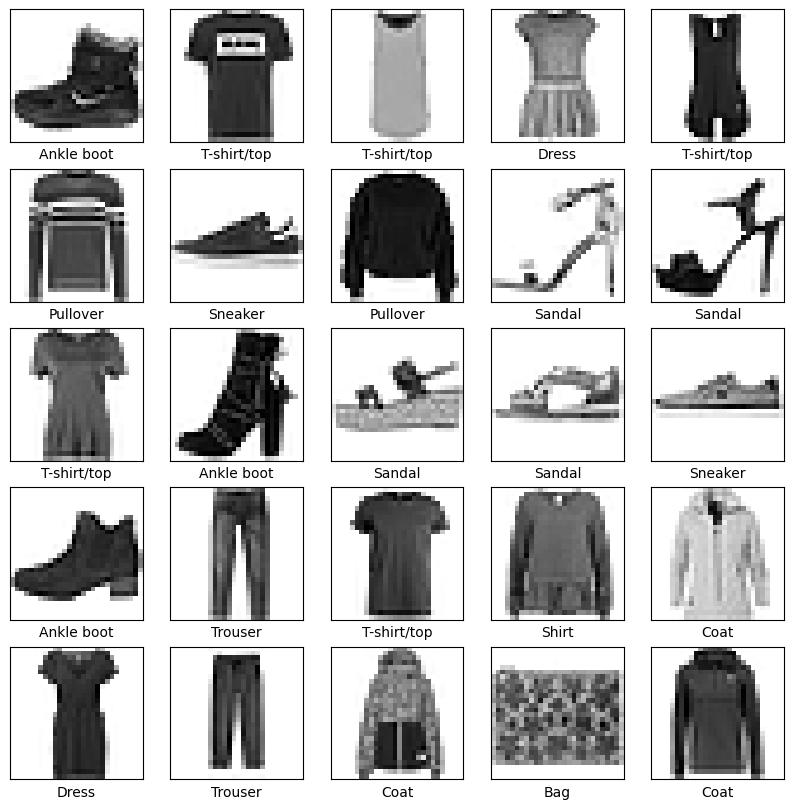

In [228]:
#Verify the data from the training set
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [229]:
#Reserve 12000 samples for validation
image_val = train_images[-12000:]
label_val = train_labels[-12000:]
train_images = train_images[:-12000]
train_labels = train_labels[:-12000]

In [230]:
#Layer specifications
#2D convolutional layer, 28 filters, 3x3 window size, ReLU activation
#2x2 max pooling
#2D convolutional layer, 56 filters, 3x3 window size, ReLU activation
#fully-connected layer, 56 nodes, ReLU activation
#fully_connected layer, 10 nodes, softmax activation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(28,3,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=None, padding="valid", data_format=None),
    tf.keras.layers.Conv2D(56,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [231]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [232]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 11, 11, 56)        14168     
                                                                 
 flatten_3 (Flatten)         (None, 6776)              0         
                                                                 
 dense_32 (Dense)            (None, 56)                379512    
                                                                 
 dense_33 (Dense)            (None, 10)                570       
                                                     

In [233]:
model_fit = model.fit(train_images,
                      train_labels,
                      batch_size=32,
                      epochs=10,
                      validation_data=(image_val,label_val))

Epoch 1/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.4331 - accuracy: 0.8459 - val_loss: 0.3194 - val_accuracy: 0.8879
Epoch 2/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2869 - accuracy: 0.8985 - val_loss: 0.2818 - val_accuracy: 0.8971
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2373 - accuracy: 0.9123 - val_loss: 0.2412 - val_accuracy: 0.9135
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2001 - accuracy: 0.9264 - val_loss: 0.2487 - val_accuracy: 0.9104
Epoch 5/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1708 - accuracy: 0.9370 - val_loss: 0.2304 - val_accuracy: 0.9163
Epoch 6/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1449 - accuracy: 0.9469 - val_loss: 0.2484 - val_accuracy: 0.9143
Epoch 7/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1225 - accuracy: 0.9553 - val_loss: 0.2692 -

In [234]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


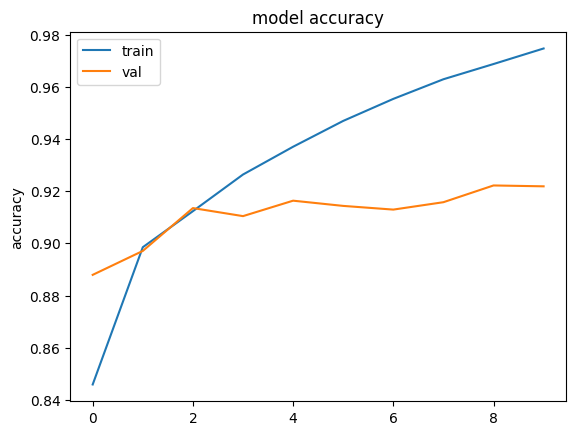

In [235]:
#Summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

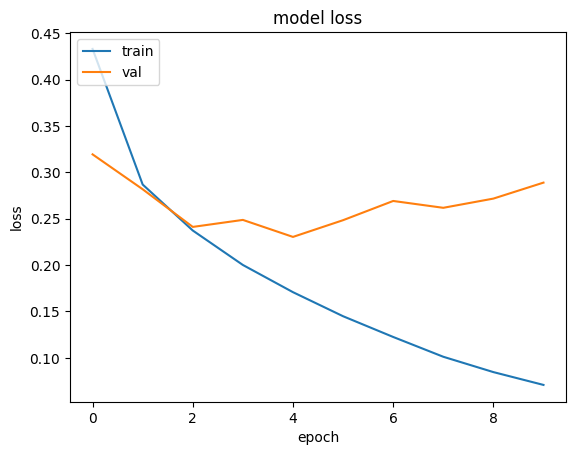

In [236]:
#Summarize the history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [237]:
#Evaluate model on test data
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels)
print("test lost, test accuracy: ", results)

Evaluate on test data
313/313 [==============================] - 3s 8ms/step - loss: 0.3053 - accuracy: 0.9165
test lost, test accuracy:  [0.30527615547180176, 0.9164999723434448]


Example of misclassify for each class: 


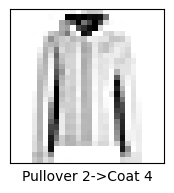

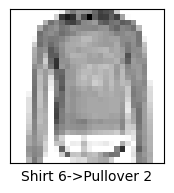

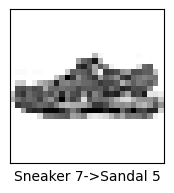

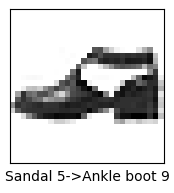

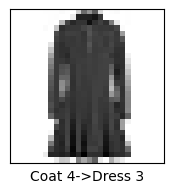

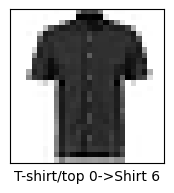

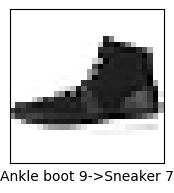

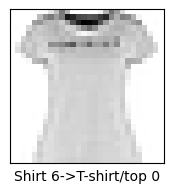

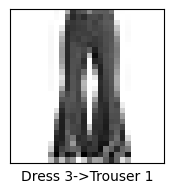

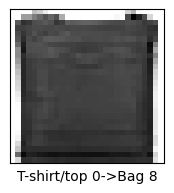

In [238]:
#Misclassify images - looping through predict and test of the first 400 items
#Array of misclassify labels
mis = []
print("Example of misclassify for each class: ")
for i in range(0,len(test_pred[:400])):
  test_predict_label = test_pred[i].argmax(axis=0)
  if(test_predict_label != test_labels[i]):
    if(test_labels[i] not in mis):
      mis.append(test_labels[i])
      # print(i, test_predict_label, test_labels[i])
      # print(class_names[test_predict_label], class_names[test_labels[i]])
      plt.figure(figsize=(2,2))
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(test_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[test_predict_label] + " " + str(test_predict_label) + "->" + class_names[test_labels[i]] + " " + str(test_labels[i]))
plt.show()

# Comments on Model Performance:

Based on the two graphs, it is clear that the accuracy and loss on the trainning set of data is more linear than the validation set, which means it is more consistent compared to the other one.
Overall, the accuracy for the training set is about 98% while the accuracy for the validation set is about 92%. Using the same model to run the testing dataset, it achieves an accuracy of around 92%, which is pretty much similar to the accuracy for the validation set.